In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os

import cv2
from matplotlib import pyplot as plt
import numpy as np

from utils import load_image, toGrey, index_row_in_array, is_row_in_array, imshow_components

In [ ]:
# image1 = toGrey(load_image('test/img/plt_c.jpeg'))
# image2 = toGrey(load_image('test/img/font_Bc.jpeg'))
# # image2 = toGrey(load_image('test/img/font_Ca.jpeg'))

In [370]:
image1 = toGrey(load_image('test/mnist_data/img_29.jpg'))
image2 = toGrey(load_image('test/mnist_data/img_57.jpg'))
# image2 = toGrey(load_image('test/mnist_data/img_26.jpg'))

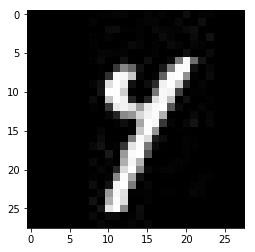

In [371]:
plt.imshow(image1.astype(np.uint8), cmap='gray')

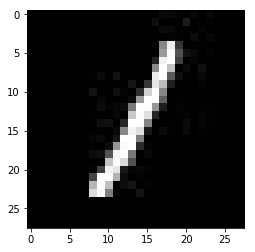

In [372]:
plt.imshow(image2.astype(np.uint8), cmap='gray')

In [373]:
y = image2.copy()
y_unique = np.unique(y)

In [339]:
img1[:,:,1].shape

(28, 28)

1


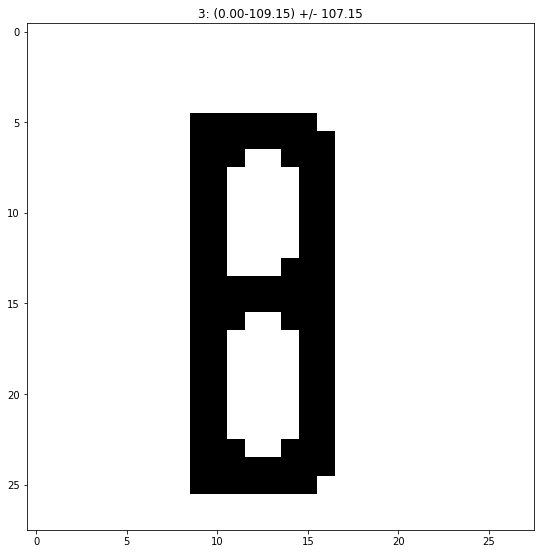

2


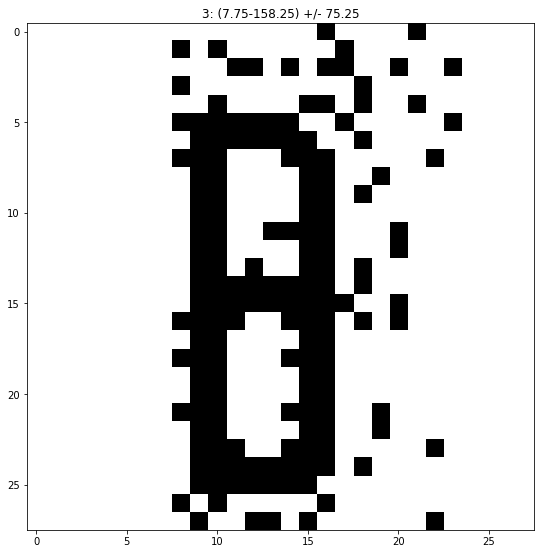

3


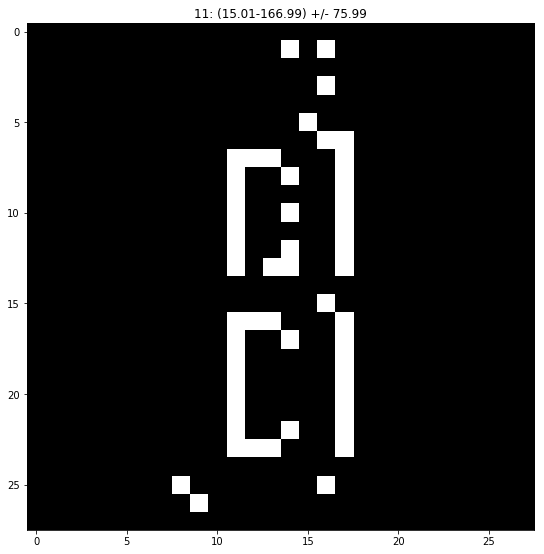

4


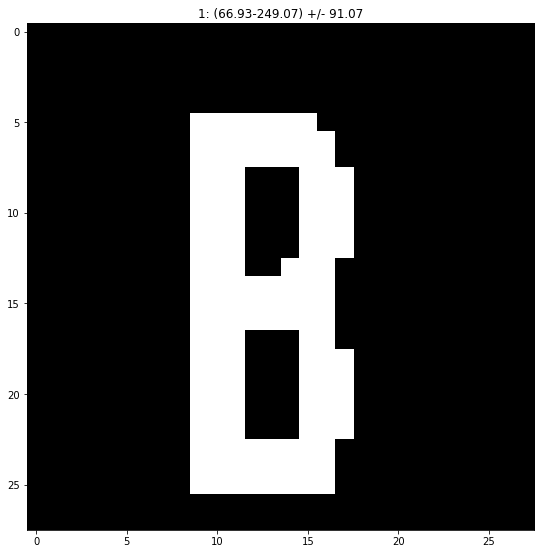

In [340]:
cls, cx = [], 0

for i in y_unique:
    m = np.sort(abs(i - y_unique).flatten()).mean()
#     print(abs(i - y_unique).flatten())
    
    a = i - m;a = 0 if a < 0 else a
    b = i + m;b = 255 if b > 255 else b
    
    img = ((y >= a) & (y <= b)).astype(np.int8)

    display = False
    if len(cls) == 0:
        cls = np.array([img], dtype=np.int8)
        prev = img.copy()
        
        display = True
#         print(img, i, m, end=" new!\n\n")
        
    else:
        diff = abs(prev - img).mean()
#         print(diff)
        if diff > 0.075 and (not is_row_in_array(img, cls)):
    #         print(img, i, m, end="\n\n")
            cls = np.concatenate((cls, [img]))
            prev = img.copy()
            display = True
    
    if display:
        imgx = img.copy()
        cx+=1
        
        fig=plt.figure(figsize=(20, 20))
        w, h, rows, columns = 10, 10, 1, 2
        
        ret, labels = cv2.connectedComponents(img)
#         labeled_img = imshow_components(labels)
        
        li = [0, img]#, labeled_img]
        
        print(len(cls))
        for k in range(1, columns*rows):
            ax = fig.add_subplot(rows, columns, k)
            ax.set_title('{}: ({:.2f}-{:.2f}) +/- {:.2f}'.format(np.amax(labels), a, b, m))
            
            if k == 2:
                img1 = li[k]
                plt.imshow(li[k])
                
            if k == 1:
                img1 = np.zeros(tuple(list(img.shape)+[3]))
                for i in range(3):
                    img1[:,:,i] = 255*img
                plt.imshow(li[k], cmap='gray')
                
                cv2.imwrite('dump/{}-{}.png'.format(len(cls), k), img1)
        plt.show()
          
    
#     if cx == 4: break

In [341]:
label = 1
pos = np.where(labels == label)
ar1, ar2 = pos

x1, x2 = min(ar1), max(ar1)+1
y1, y2 = min(ar2), max(ar2)+1

img_objx = imgx.copy()
img_objx[np.where(labels != label)] = 0
img_objx = img_objx[x1:x2, y1:y2]

In [342]:
img_2x = img_objx.copy()

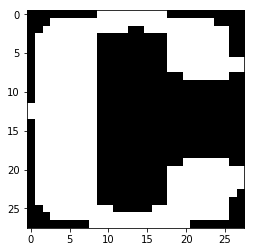

In [343]:
plt.imshow(img_1x, cmap='gray')

In [344]:
img_1x.shape

(28, 28)

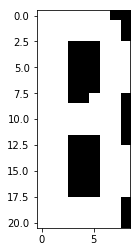

In [345]:
plt.imshow(img_2x, cmap='gray')

In [346]:
img_2x.shape

(21, 9)

In [347]:
c11, c12 = img_1.shape
c21, c22 = img_2.shape

r = c21 if c21 < c11 else c11
c = c22 if c22 < c12 else c12

img_1 = cv2.resize(img_1x.astype(np.uint8), (c, r), interpolation = cv2.INTER_AREA).astype(np.int8)
img_2 = cv2.resize(img_2x.astype(np.uint8), (c, r), interpolation = cv2.INTER_AREA).astype(np.int8)
(r, c), img_1.dtype

((21, 9), dtype('int8'))

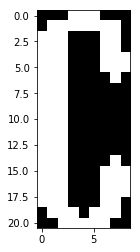

In [348]:
plt.imshow(img_1, cmap='gray')

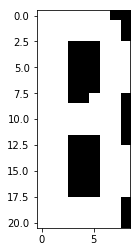

In [349]:
plt.imshow(img_2, cmap='gray')

In [350]:
img_1.shape, img_2.shape

((21, 9), (21, 9))

In [351]:
img_1a, img_1b = np.where(img_1 == 1)
img_1a = int(img_1a.mean())
img_1b = int(img_1b.mean())

img_1.shape, img_1a, img_1b

((21, 9), 10, 3)

In [352]:
img_2a, img_2b = np.where(img_2 == 1)
img_2a = int(img_2a.mean())
img_2b = int(img_2b.mean())

img_2.shape, img_2a, img_2b

((21, 9), 10, 3)

In [353]:
d, f = img_1.shape
g, h = img_2.shape

if img_1a <= img_2a:
    img_1x1 = img_2a - img_1a
    img_1x2 = img_1x1 + d
    
    img_2x1, img_2x2 = 0, g
    
else:
    img_2x1 = img_1a - img_2a
    img_2x2 = img_2x1 + g
    
    img_1x1, img_1x2 = 0, d
    

if img_1b <= img_2b:
    img_1y1 = img_2b - img_1b
    img_1y2 = img_1y1 + f
    
    img_2y1, img_2y2 = 0, h
    
else:
    img_2y1 = img_1b - img_2b
    img_2y2 = img_2y1 + h
    
    img_1y1, img_1y2 = 0, f
    
r = max((img_1x2, img_2x2))
c = max((img_1y2, img_2y2))

img_1x1,img_1x2, img_1y1,img_1y2, '=>', img_2x1, img_2x2, img_2y1, img_2y2

(0, 21, 0, 9, '=>', 0, 21, 0, 9)

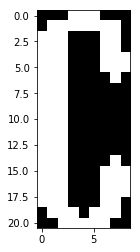

In [354]:
img_n1 = np.zeros((r, c), dtype=np.int8)
img_n1[img_1x1:img_1x2, img_1y1:img_1y2] = img_1
plt.imshow(img_n1, cmap='gray')

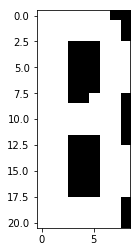

In [355]:
img_n2 = np.zeros((r, c), dtype=np.int8)
img_n2[img_2x1:img_2x2, img_2y1:img_2y2] = img_2
plt.imshow(img_n2, cmap='gray')

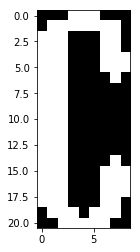

In [356]:
img_b = img_n1.copy()
img_b[img_n2 == 0] = 0
plt.imshow(img_b, cmap='gray')

In [366]:
np.where(img_n2 == 0)
np.where(img)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int8)

In [369]:
m = 255 if np.amax(img_n1) > 1 or np.amax(img_n2) > 1 else 1

z1 = (m - abs(img_b - img_n2).mean()) / m
z2 = (m - abs(img_b - img_n1).mean()) / m
z3 = (m - abs(img_n2 - img_n1).mean()) / m

z1, z2, (z1 + z3 + z3) / 3

(0.7513227513227514, 1.0, 0.7513227513227513)

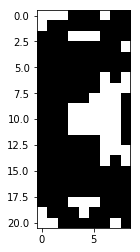

In [359]:
plt.imshow(cv2.absdiff(img_b, img_n2), cmap='gray')

In [111]:
(0.9603040540540541, 0.6587510993843448, 0.8095275767191994)

(0.9603040540540541, 0.6587510993843448, 0.8095275767191994)

In [112]:
(0.9453125, 0.6539179104477613, 0.7996152052238806)

(0.9453125, 0.6539179104477613, 0.7996152052238806)

In [320]:
0.8115384615384615 * (1 - 0.2459016393442623)

0.6119798234552333